# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

In [3]:
# generate the scatter plot to make sure that the cities are evenly distributed throughout the globe
#plt.scatter(lat_lngs[lats],lat_lngs[lngs],marker="o",facecolors="red",edgecolors="black",s=50,alpha=0.75)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# API set up
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="

# Counter to delay the process
record = 1

# Lists to hold data
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Loop through the list of cities
for city in enumerate(cities):
    if record == 50:
        record +=1
        time.sleep(60)
    
    query_url = f"{url}{api_key}&q={city}"
    #print(query_url)
    response = requests.get(query_url).json()
    
    # Print the record for review 
    print(f"{city} was found in the Open Weathermap API\n")
            
        # Append the pertinent data to lists above using the variables created above
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    
    # If the data is not in Open WeatherMap API and it creates a Null
    except:
        print(f"{city} was not found in the Open Weathermap API\n")
        record +=1
        pass
    
print("Completed") 

hilo was found in the Open Weathermap API

port elizabeth was found in the Open Weathermap API

hermanus was found in the Open Weathermap API

yarim was found in the Open Weathermap API

port macquarie was found in the Open Weathermap API

husavik was found in the Open Weathermap API

yellowknife was found in the Open Weathermap API

moron was found in the Open Weathermap API

chapais was found in the Open Weathermap API

rikitea was found in the Open Weathermap API

henties bay was found in the Open Weathermap API

byron bay was found in the Open Weathermap API

kaitangata was found in the Open Weathermap API

buala was found in the Open Weathermap API

raudeberg was found in the Open Weathermap API

butaritari was found in the Open Weathermap API

severo-kurilsk was found in the Open Weathermap API

anchorage was found in the Open Weathermap API

castro was found in the Open Weathermap API

jamestown was found in the Open Weathermap API

nikolskoye was found in the Open Weathermap AP

agdam was found in the Open Weathermap API

mahebourg was found in the Open Weathermap API

cochrane was found in the Open Weathermap API

santiago was found in the Open Weathermap API

aska was found in the Open Weathermap API

tamandare was found in the Open Weathermap API

ruidoso was found in the Open Weathermap API

katherine was found in the Open Weathermap API

chulym was found in the Open Weathermap API

laukaa was found in the Open Weathermap API

narsaq was found in the Open Weathermap API

soyo was found in the Open Weathermap API

puerto escondido was found in the Open Weathermap API

basoko was found in the Open Weathermap API

cocoa beach was found in the Open Weathermap API

atar was found in the Open Weathermap API

padang was found in the Open Weathermap API

maragogi was found in the Open Weathermap API

bonanza was found in the Open Weathermap API

hami was found in the Open Weathermap API

carnarvon was found in the Open Weathermap API

pevek was found in the Open W

prince rupert was found in the Open Weathermap API

merauke was found in the Open Weathermap API

raga was found in the Open Weathermap API

lewistown was found in the Open Weathermap API

sijunjung was found in the Open Weathermap API

le port was found in the Open Weathermap API

vardo was found in the Open Weathermap API

novoilinsk was found in the Open Weathermap API

hambantota was found in the Open Weathermap API

menongue was found in the Open Weathermap API

saskylakh was found in the Open Weathermap API

saint-augustin was found in the Open Weathermap API

hihya was found in the Open Weathermap API

berlevag was found in the Open Weathermap API

mocajuba was found in the Open Weathermap API

carinhanha was found in the Open Weathermap API

palafrugell was found in the Open Weathermap API

karratha was found in the Open Weathermap API

umzimvubu was found in the Open Weathermap API

umzimvubu was not found in the Open Weathermap API

sao joao da barra was found in the Open Wea

mangrol was found in the Open Weathermap API

viligili was found in the Open Weathermap API

viligili was not found in the Open Weathermap API

norman wells was found in the Open Weathermap API

lere was found in the Open Weathermap API

smithers was found in the Open Weathermap API

kuna was found in the Open Weathermap API

ratnagiri was found in the Open Weathermap API

blythe was found in the Open Weathermap API

aparecida was found in the Open Weathermap API

huilong was found in the Open Weathermap API

pelym was found in the Open Weathermap API

mafeteng was found in the Open Weathermap API

sosnovo-ozerskoye was found in the Open Weathermap API

zhigansk was found in the Open Weathermap API

hastings was found in the Open Weathermap API

pangnirtung was found in the Open Weathermap API

sangar was found in the Open Weathermap API

semnan was found in the Open Weathermap API

kralendijk was found in the Open Weathermap API

college was found in the Open Weathermap API

wembley w

jieshi was found in the Open Weathermap API

vao was found in the Open Weathermap API

cape canaveral was found in the Open Weathermap API

ulaanbaatar was found in the Open Weathermap API

amparafaravola was found in the Open Weathermap API

sabla was found in the Open Weathermap API

Completed


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
# Create a dictionary to keep data 
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

In [37]:
# Convert the dictionary into a dataframe and display
cities_df = pd.DataFrame(weather_data)
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hilo,90,US,1606106761,88,19.73,-155.09,75.20,5.82
1,Port Elizabeth,40,ZA,1606106734,93,-33.92,25.57,62.60,3.36
2,Hermanus,95,ZA,1606106801,86,-34.42,19.23,60.01,5.70
3,Yarim,25,YE,1606106801,40,14.30,44.38,54.88,4.34
4,Port Macquarie,40,AU,1606106786,51,-31.43,152.92,84.20,8.05


In [38]:
# Save the dataframe
cities_df.to_csv("open_weathermap_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

FileNotFoundError: [Errno 2] No such file or directory: 'Pics/Lat_v_max_temp.png'

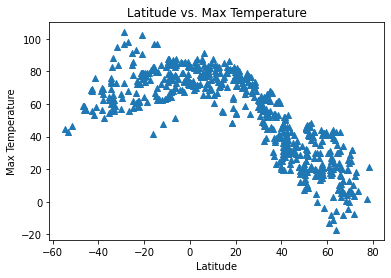

In [40]:
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker = "^")
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

plt.savefig("Pics/Lat_v_max_temp.png")
plt.show()

print("Conclusion")

## Latitude vs. Humidity Plot

In [ ]:
plt.scatter(cities_df["lat"], cities_df["humidity"], marker = "^")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("Pics/Lat_v_Humidity.png")
plt.show()

print("Conclusion")

## Latitude vs. Cloudiness Plot

In [ ]:
plt.scatter(cities_df["lat"], cities_df["cloudiness"], marker = "^")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("Pics/Lat_v_Cloudiness.png")
plt.show()

print("Conclusion")

## Latitude vs. Wind Speed Plot

In [ ]:
plt.scatter(cities_df["lat"], cities_df["w_speed"], marker = "^")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("Pics/Lat_v_w_speed.png")
plt.show()

print("Conclusion")

## Linear Regression

In [ ]:
#Divide the cities into Northern and Southern Hemisphere DataFrames
northern_df = cities_df.loc[cities_df["lat"].astype(float) > 0]
southern_df = cities_df.loc[cities_df["lat"].astype(float) < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Run Linear Regression Analysis
x_values = northern_df["lat"]
y_values = northern_df["temp_max"]

# Plot scatter plot
plt.scatter(x_values,y_values)

# Regression line info
(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

# Plot the regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 6, color = "green")

# Title & Axis labels
plt.title("Northern Hemisphere - Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Display the analysis results
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/North_Hem_Lat_v_Max_temp.png")
plt.show()

print("conclusion")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
#Run Linear Regression Analysis
x_values = southern_df["lat"]
y_values = southern_df["temp_max"]

#Plot scatter plot
plt.scatter(x_values,y_values)

# Regression line info
(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 6, color = "green")

#Title & Axis labels
plt.title("Northern Hemisphere - Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Display the analysis results
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/North_Hem_Lat_v_temp_max.png")
plt.show()

print("conclusion")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
#Run Linear Regression Analysis
x_values = northern_df["lat"]
y_values = northern_df["humidity"]

#Plot scatter plot
plt.scatter(x_values,y_values)

# Regression line info
(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 6, color = "green")

#Title & Axis labels
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Display the analysis results
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/North_Hem_Hum_vs_Lat.png")
plt.show()

print("conclusion")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
#Run Linear Regression Analysis
x_values = southern_df["lat"]
y_values = southern_df["humidity"]

#Plot scatter plot
plt.scatter(x_values,y_values)

# Regression line info
(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 6, color = "green")

#Title & Axis labels
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Display the analysis results
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/South_Hem_Hum_vs_Lat.png")
plt.show()

print("conclusion")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
#Run Linear Regression Analysis
x_values = northern_df["lat"]
y_values = northern_df["clouds"]

#Plot scatter plot
plt.scatter(x_values,y_values)

# Regression line info
(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 6, color = "green")

#Title & Axis labels
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Display the analysis results
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/North_Hem_Cloudi_vs_Lat.png")
plt.show()

print("Conclusion")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:

#Run Linear Regression Data
x_values = southern_df["lat"]
y_values = southern_df["clouds"]

#Plot scatter plot
plt.scatter(x_values,y_values)

# Regression line info
(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 6, color = "green")

#Title & Axis labels
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Display the analysis results
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/South_Hem_Cloudi_vs_Lat.png")
plt.show()

print("Conclusion")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
#Run Linear Regression Data
x_values = northern_df["lat"]
y_values = northern_df["wind"]

#Plot scatter plot
plt.scatter(x_values,y_values)

# Regression line info
(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 6, color = "green")

#Title & Axis labels
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/North_Hem_W_Speed_vs_Lat.png")
plt.show()

print("Conclusion.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
#Run Linear Regression Data
x_values = southern_df["lat"]
y_values = southern_df["wind"]

#Plot scatter plot
plt.scatter(x_values,y_values)


(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))



#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 6, color = "green")

#Title & Axis labels
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/South_Hem_W_Speed_vs_Lat.png")
plt.show()

print("Conclusion")